In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("Data/DataPreparation.csv")
data

,Date,Open,High,Low,Close,Volume,Stocks
0,2005-07-22,1.305554,1.322384,1.304051,1.322384,301106400,AAPL
1,2005-07-25,1.322084,1.330800,1.314270,1.316674,294627200,AAPL
2,2005-07-26,1.322685,1.325690,1.303149,1.311264,268592800,AAPL
3,2005-07-27,1.317275,1.324489,1.282413,1.322084,283749200,AAPL
4,2005-07-28,1.317876,1.322385,1.301347,1.316374,251311200,AAPL
...,...,...,...,...,...,...,...
25130,2025-07-10,156.100006,159.240005,155.820007,157.690002,6732900,JNJ
25131,2025-07-11,157.089996,157.179993,155.179993,156.899994,7872000,JNJ
25132,2025-07-14,156.869995,157.470001,155.520004,156.820007,10185600,JNJ
25133,2025-07-15,156.360001,157.190002,154.800003,155.169998,6873200,JNJ


In [6]:
data.isnull().sum() #Checking Null

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Stocks    0
dtype: int64

In [7]:
data.duplicated().sum()#No Duplication

np.int64(0)

C:\Users\lipun\AppData\Local\Temp\ipykernel_27620\1650146747.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Volume"],ax=ax[1,1],bins=20,kde=True)


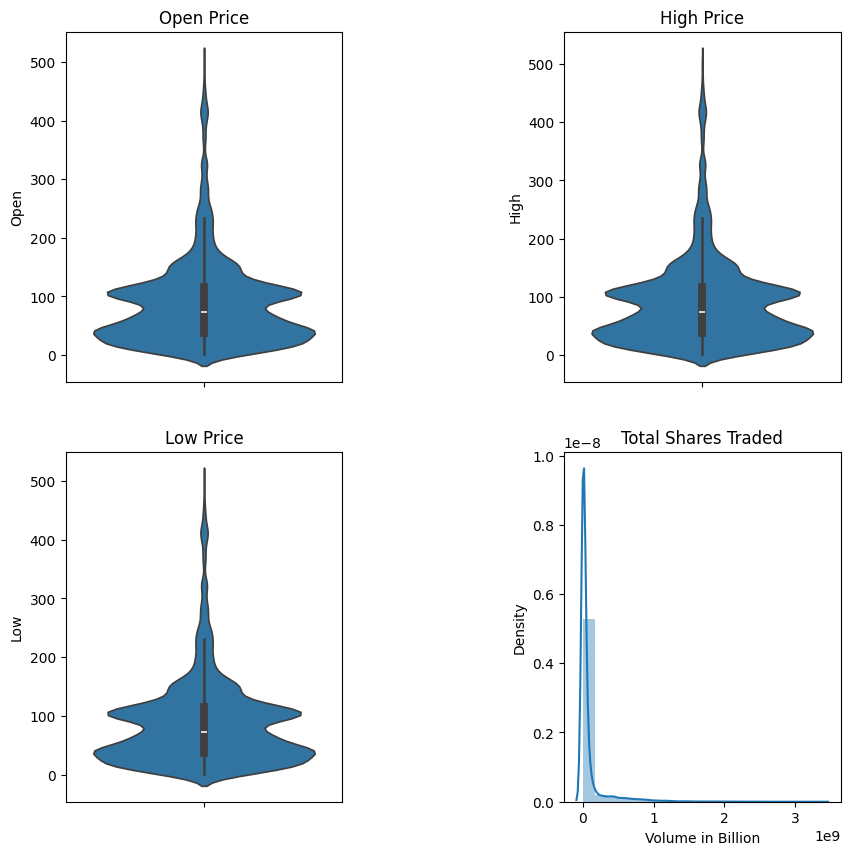

In [15]:
#Outliers Detection
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(10,10))
plt.subplots_adjust(wspace=0.8)
sns.violinplot(data["Open"],ax=ax[0,0])
sns.violinplot(data["High"],ax=ax[0,1])
sns.violinplot(data["Low"],ax=ax[1,0])
sns.distplot(data["Volume"],ax=ax[1,1],bins=20,kde=True)
ax[0,0].set_title("Open Price")
ax[0,1].set_title("High Price")
ax[1,0].set_title("Low Price")
ax[1,1].set_title("Total Shares Traded")
ax[1,1].set_xlabel("Volume in Billion")
plt.savefig("Visuals/DataValid_OutlierDetection",dpi=100)
plt.show()

In [9]:
data.describe()

,Open,High,Low,Close,Volume
count,25135.000000,25135.000000,25135.000000,25135.000000,2.513500e+04
mean,89.202614,90.015203,88.393468,89.235277,8.695512e+07
std,74.900517,75.589054,74.224085,74.956035,2.214857e+08
min,1.277002,1.292330,1.262877,1.281811,1.074765e+06
25%,37.364280,37.664564,37.025923,37.362452,6.285770e+06
50%,74.029917,74.642012,73.429227,74.055542,1.249190e+07
75%,116.011848,116.805321,115.080710,115.927753,4.992315e+07
max,505.179993,508.299988,502.790009,505.820007,3.372970e+09


In [10]:
#Renaming Stocks Names
stocks = list()
for i,j in enumerate(data["Stocks"]):
    if j=="AAPL":
        data.loc[i,"Stocks"]="Apple"
    elif j=="MSFT":
        data.loc[i,"Stocks"]="Microsoft"
    elif j=="JNJ":
        data.loc[i,"Stocks"]="Johnson&Johnson"
    else:
        data.loc[i,"Stocks"]="GeneralElectric"

In [11]:
data

,Date,Open,High,Low,Close,Volume,Stocks
0,2005-07-22,1.305554,1.322384,1.304051,1.322384,301106400,Apple
1,2005-07-25,1.322084,1.330800,1.314270,1.316674,294627200,Apple
2,2005-07-26,1.322685,1.325690,1.303149,1.311264,268592800,Apple
3,2005-07-27,1.317275,1.324489,1.282413,1.322084,283749200,Apple
4,2005-07-28,1.317876,1.322385,1.301347,1.316374,251311200,Apple
...,...,...,...,...,...,...,...
25130,2025-07-10,156.100006,159.240005,155.820007,157.690002,6732900,Johnson&Johnson
25131,2025-07-11,157.089996,157.179993,155.179993,156.899994,7872000,Johnson&Johnson
25132,2025-07-14,156.869995,157.470001,155.520004,156.820007,10185600,Johnson&Johnson
25133,2025-07-15,156.360001,157.190002,154.800003,155.169998,6873200,Johnson&Johnson


In [12]:
#Arranging DataSet
Data = pd.concat([data["Stocks"],data.iloc[:,[0,1,2,3,5]],data.iloc[:,[4]]],axis=1)
Data

,Stocks,Date,Open,High,Low,Volume,Close
0,Apple,2005-07-22,1.305554,1.322384,1.304051,301106400,1.322384
1,Apple,2005-07-25,1.322084,1.330800,1.314270,294627200,1.316674
2,Apple,2005-07-26,1.322685,1.325690,1.303149,268592800,1.311264
3,Apple,2005-07-27,1.317275,1.324489,1.282413,283749200,1.322084
4,Apple,2005-07-28,1.317876,1.322385,1.301347,251311200,1.316374
...,...,...,...,...,...,...,...
25130,Johnson&Johnson,2025-07-10,156.100006,159.240005,155.820007,6732900,157.690002
25131,Johnson&Johnson,2025-07-11,157.089996,157.179993,155.179993,7872000,156.899994
25132,Johnson&Johnson,2025-07-14,156.869995,157.470001,155.520004,10185600,156.820007
25133,Johnson&Johnson,2025-07-15,156.360001,157.190002,154.800003,6873200,155.169998


In [13]:
Data.corr(numeric_only=True)

,Open,High,Low,Volume,Close
Open,1.000000,0.999904,0.999904,-0.319900,0.999808
High,0.999904,1.000000,0.999860,-0.319468,0.999908
Low,0.999904,0.999860,1.000000,-0.320382,0.999905
Volume,-0.319900,-0.319468,-0.320382,1.000000,-0.319832
Close,0.999808,0.999908,0.999905,-0.319832,1.000000


<h1><b>FINAL REPORT: DATA PREPARATION</b></h1>
<li>No Null Values Detected</li>
<li>No Duplicated Values</li>
<li>Outliers Detected in Features "open","high","low" and volume however realistically possible in StockMarket-world applications and scenarios</li>
<li>Renamed Stocks Name but better convineince</li>
<li>Arranged Dataset for Separating Independent and Dependent Features</li>
<b>Insights Gained:</b>
<li>Samples Points are Densely Scattered around price 50-150 for features "open","high" and "low" </li>
<li>Volume forms Highly Right-skewed graph.Data-points are significantly dense below 1billion of Total-shares traded</li>
<li>Features are highly co-related</li>
<li>Negative Correlation between Volume and other Features</li>
<img src="Visuals/DataValid_OutlierDetection.png" width=600>
